In [1]:
import sys, os

# print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append('/Users/peerasit/senior_project/STELLA-Backend')
sys.path.append('/Users/peerasit/senior_project/STELLA-Backend/stella')
sys.path.append('/Users/peerasit/senior_project/STELLA-Backend/stella/services')
# from dotenv import load_dotenv

# load_dotenv()
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"] = os.getenv("OPEN_AI_API_KEY")

In [2]:
from stella.services.srag import app

/Users/peerasit/senior_project/STELLA-Backend/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[CORE] Initializing Milvus Database Core...
[DB] init Embedding Model...
[DB] init Embedding Model Successfully.
[DB] Found Database: stella_vector_db


## Dataset

In [ ]:
questions = [
    "What is bts?",
    "What is awc",
    "การดำเนินธรุรกิจของ bts",
    "What is Airports of Thailand",
    "gri คือ",
    "บริษัท บ้านปู จำกัด (มหาชน) ทำอะไร",
    "siam global house คือ",
    "What are the main risk factors for Kasikornbank?",
    "รายได้ของ Kasikornbank เทียบกับ scb ในปีล่าสุด",
    "ndc ในไทย"  

    "ความเสี่ยงหลักที่เกิดขึ้นจาก ปตท",
    "กิจการหลักของโฮม โปร",
    "ความแตกต่างของ ptt และ pttep",
    "How many total shares were issued by BTS?",
    "OR มีการระบุความเสี่ยงทางด้านการเปลี่ยนแปลงภูมิอากาศหรืิอไม่?",
    "เปรียบเทียบความเสี่ยงด้านmที่เกิดขึ้นของ BBL และ ธนาคารกรุงไทย",
    "Land and House คือ",
    "นโยบายของ ndc ในประเทศไทย",
    "เปรียบเทียบ กรุงเทพดุสิตเวชการ และ บำรุงราษฎร์",
    "ผลกระทบด้านสิ่งแวดล้อมที่เกิดขึ้นจาก ทรู",

    "บัตรกรุงไทย มีความเสี่ยงด้านบุคลากรหรือไม่? อธิบาย",
    "ไมเนอร์ คือชื่อบริษัทที่ทำธุรกิจอะไร?",
    "ความเสี่ยงที่เกิดขึ้นจาก ศรีสวัสดิ",
    "แคล-คอมพ์ และ com7 คือ",
    "การจัดการสิ่งแวดล้อมของโอสถสภา",

    "นโยบายการจัดการสิ่งแวดล้อมของ cpall",
    "cpn คือชื่อบริษัทที่ทำธุรกิจอะไร?",
    "Global Reporting คืออะไร",
    "ความเสี่ยงของ delta มีอะไรบ้าง",
    "mtc คือ",
]

ground_truths = [
    "บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)",
    "บริษัท แอสเสท เวิรด์ คอร์ป จำกัด (มหาชน)",
    "MOVE, MIX, MATCH",
    "บริษัท ท่าอากาศยานไทย จำกัด (มหาชน)",
    "Global Reporting Initiative",
    "กลุ่มธุรกิจแหล่งพลังงาน",
    "เป็นศูนย์จำหน่ายสินค้าวัสดุก่อสร้าง วัสดุตกแต่ง เครื่องมือ อุปกรณ์ที่ใช้ในงานก่อสร้าง",
    "main risk factors include strategic risks, customer behavior changes, and industry volatility.",
    "192,653,621.00",
    "แผนพัฒนากำลังผลิตไฟฟ้า (Power Development Plan) 2015-2036",


    "ความไม่แน่นอนของภาวะเศรษฐกิจ",
    "ก่อสร้าง ตกแต่ง ต่อเติมซ่อมแซม ปรับปรุง อาคาร บ้าน และที่อยู่อาศัยแบบครบวงจร",
    "ธุรกิจก๊าซธรรมชาติ, ระบบท่อส่งก๊าซ, การสำรวจและผลิตปิโตรเลียม",
    "13,167,638,462 shares",
    "ความเส่ียงจากการเปลี่ยนแปลงสภาพภูมิอากาศ",
    "ความผันผวนของอัตราแลกเปลี่ยน / อัตราดอกเบี้ย / อัตราเงินเฟ้อ",
    "บริษัท แลนด์ แอนด์ เฮ้าส์ จำกัด (มหาชน)",
    "(Energy Efficiency Plan - EEP)",
    "มีการจัดการพลังงานไฟฟ้า, น้ำมัน, เชื้อเพลิง, ทรัพยากรน้ำ, ขยะ, ก๊าซเรือนกระจก",
    "995,560,735.11",

    "1705",
    "บริษัท ไมเนอร์ อินเตอร์เนชั่นแนล จำกัด (มหาชน)",
    "ความเสี่ยงเชิงกลยุทธ์, ความเสี่ยงจากการลงทุนในธุรกิจใหม่",

    "CCET, COM7",
    "177,712,225",

    "การจัดการพลังงานไฟฟ้า, การจัดการน้ำมันและเชื้อเพลิง, การจัดการ พลังงานทดแทน/พลังงานสะอาด",
    " ประกอบธุรกิจพัฒนาและให้เช่าพื้นที่ศูนย์การค้าขนาดใหญ่ รวมถึงธุรกิจอื่นที่เกี่ยวเนื่อง",
    "Global Reporting Initiative คือองค์กรที่พัฒนามาตรฐานการรายงานความยั่งยืนที่ใช้กันอย่างแพร่หลายทั่วโลก",
    "ความผันผวนในอุตสาหกรรมที่ดำเนินธุรกิจอยู่, การเปลี่ยนแปลงด้านเทคโนโลยี",
    "บริษัท เมืองไทย แคปปิตอล จำกัด (มหาชน)",
]

# questions = [
#     "What is the registered company name of BTS Group Holdings?",
#     "What is the registered company name of Bangkok Airways?",
#     "What are the primary business operations of BTS Group Holdings?",
#     "What are the primary business operations of Bangkok Airways?",
#     "What was BTS’s total revenue in 2023?",
#     "What was BA’s total revenue in 2023?",
#     "Compare the percentage of revenue from domestic vs. international sources for BTS and BA in 2023.",
#     "Which company had a higher revenue growth rate from 2022 to 2023?",
#     "What percentage of BTS’s revenue came from the MOVE segment in 2023?",
#     "What percentage of BA’s revenue came from airline operations in 2023?",
#     "Which company had a more diversified revenue stream?",
#     "How much electricity did BTS consume in 2023?",
#     "How much electricity did BA consume in 2023?",
#     "Which company had higher CO₂ emissions in 2023?",
#     "What was the total water consumption of BTS in 2023?",
#     "What was the total water consumption of BA in 2023?",
#     "What was the total number of employees in BTS in 2023?",
#     "What was the total number of employees in BA in 2023?",
#     "What was the total compensation paid to BTS employees in 2023?",
#     "What was the total compensation paid to BA employees in 2023?",
#     "Which company had a higher voluntary turnover rate in 2023?",
#     "How many board members does BTS have?",
#     "How many board members does BA have?",
#     "What percentage of BTS’s board members are independent directors?",
#     "What percentage of BA’s board members are independent directors?",
#     "What are the top three strategic risks faced by BTS?",
#     "What are the top three strategic risks faced by BA?",
    # "How many total shares were issued by BTS?",
#     "How many total shares were issued by BA?",
#     "Compare the financial risk exposure of BTS and BA in terms of currency exchange rate volatility."
# ]


# ground_truths = [
#     "บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)",
#     "บริษัท การบินกรุงเทพ จำกัด (มหาชน)",
#     "Mass transit, advertising, and business partnerships (MOVE, MIX, MATCH)",
#     "Airline operations, airport business, and related services",
#     "24,138,715.99 thousand THB",
#     "21,732,513.00 thousand THB",
#     "BTS: Domestic: 100%, International: 0% | BA: Domestic: 71.52%, International: 28.48%",
#     "BA had a higher growth rate (from 12,742,078 to 21,732,513), whereas BTS had a decline (from 31,194,500.54 to 24,138,715.99).",
#     "50.93%",
#     "68.91%",
#     "BTS (MOVE, MIX, MATCH), while BA relies more on airline operations.",
#     "176,404,000 kWh",
#     "8,845,032.51 kWh",
#     "BTS: 153,249 tons | BA: 293,222 tons (Higher emissions)",
#     "199,500 cubic meters",
#     "189,189.30 cubic meters",
#     "5,880",
#     "2,291",
#     "3,360,079,885.65 THB",
#     "2,240,629,789.00 THB",
#     "BTS: 12.60% | BA: 6.77% (BTS had a higher turnover rate)",
#     "12",
#     "11",
#     "50.00%",
#     "36.36%",
#     "1. Industry volatility, 2. Government policies, 3. Customer demand changes",
#     "1. Industry volatility, 2. International policies, 3. Technology changes",
    # "13,167,638,462 shares",
#     "2,100,000,000 shares",
#     "BTS has no revenue exposure to foreign exchange (100% domestic). BA has 28.48% of revenue from international sources, making it more exposed to exchange rate fluctuations."
# ]

In [239]:
contexts = []
answers = []
for i in range(0, len(questions)):
    answer = app.invoke({"question": questions[i], "session_id": ""})
    answers.append(answer["generation"])
    print("dsdsdfsfs", [c.page_content for c in answer['documents']])
    contexts.append([c.page_content for c in answer['documents']])
    print(answer)

Classify question
Classify: Extract
Retrieve:
[Grade Doc] Question: What is bts?
gri 0.7960489392280579 0.75
ndc 0.7774947285652161 0.75


Decision [{'bts': ['2023']}]
Searching [{'bts': ['2023']}]
search ['bts', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bts_56-1_2023.pdf', 'company_name': 'bts', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BTS\nสถานที่ตั้งสำนักงานใหญ่ : ชั้น 14-15 อาคารทีเอสที ทาวเวอร์ เลขที่ 21 ซอยเฉยพ่วง ถนนวิภาวดี-รังสิต\nแขวงจอมพล เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : กลุ่มบริษัทที่ประกอบธุรกิจในหลากหลายอุตสาหกรรมโดยมุ่งเน้นการใช้\nประโยชน์จากการเข้าถึงข้อมูลเครือข่ายระบบขนส่งมวลชนและสื่อโฆษณา\nรวมทั้งการเป็นพันธม

Decision [{'awc': ['2023']}]
Searching [{'awc': ['2023']}]
search ['awc', 'gri', 'ndc']


Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'awc_56-1_2023.pdf', 'company_name': 'awc', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท แอสเสท เวิรด์ คอร์ป จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : AWC\nสถานที่ตั้งสำนักงานใหญ่ : เลขที่ 1 อาคารเอ็มไพร์ทาวเวอร์ ชั้นที่ 54 ถนนสาทรใต้ แขวงยานนาวา เขต\nสาทร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10120\nประเภทธุรกิจ : บริษัทประกอบธุรกิจโดยการถือหุ้นในบริษัทอื่น (Holding Company) ที่\nประกอบธุรกิจอสังหาริมทรัพย์ชั้นนำที่มุ่งตอบสนองไลฟ์สไตล์แบบครบวงจรใน\nประเทศไทย อันประกอบไปด้วยกลุ่มธุรก

Decision [{'bts': ['2023']}]
Searching [{'bts': ['2023']}]
search ['bts', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bts_56-1_2023.pdf', 'company_name': 'bts', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BTS\nสถานที่ตั้งสำนักงานใหญ่ : ชั้น 14-15 อาคารทีเอสที ทาวเวอร์ เลขที่ 21 ซอยเฉยพ่วง ถนนวิภาวดี-รังสิต\nแขวงจอมพล เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : กลุ่มบริษัทที่ประกอบธุรกิจในหลากหลายอุตสาหกรรมโดยมุ่งเน้นการใช้\nประโยชน์จากการเข้าถึงข้อมูลเครือข่ายระบบขนส่งมวลชนและสื่อโฆษณา\nรวมทั้งการเป็นพันธมิตรท

Decision [{'aot': ['2023']}]
Searching [{'aot': ['2023']}]
search ['aot']
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
CONTEXT: [Document(metadata={'file_name': 'aot_56-1_2023.pdf', 'company_name': 'aot', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท ท่าอากาศยานไทย จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : AOT\nสถานที่ตั้งสำนักงานใหญ่ : 333 หมู่ที่ 7 ถนนเชิดวุฒากาศ แขวงสีกัน เขตดอนเมือง\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10210\nประเภทธุรกิจ : ทอท.ประกอบธุรกิจท่าอากาศยานของประเทศไทย โดยธุรกิจหลัก\nประกอบด้วย การจัดการ การดำเนินงาน และการพัฒนาท่าอากาศยาน โดยมี\nท่าอากาศยานในความรับผิดชอบ 6 แห่ง คือ ท่าอากาศยานสุวรรณภูมิ\nท่าอากาศยานดอนเมือง ท่าอากาศยานเชียงให

LLM Decision []
search ['gri', 'ndc']
Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'GRIstandard.pdf'}, page_content='จากความนิยมใน GRI ฉบับ G4 ซึ่งมีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง ล่าสุดในปี 2559 GRI ได้ออกมาตรฐานการรายงาน\n“GRI Standards” ทดแทนฉบับ G4 ที่จะสามารถใช้ได้ถึงเดือนมิถุนายน 2561 โดยหลังจากนี้แล้ว องค์กรที่ใช้ GRI เป็น\nกรอบการรายงานต้องใช้กรอบการรายงานตามฉบับ GRI Standards แทน\nพัฒนาการของ GRI\nG1\n2000 Univesal Standards Topic-specific Standards\nG3\n2006 G Die sn ce lora sl ures EEcEcoEconconoonomnomo im cim cicic\nG4\n2013 G 10RI 2 G 2G 2G 2G 2 0R 0R 0R 0R I 0I 0I 0I 0\nGRI Standa 2r 0d 16s F G 1oun 0Rda It 1ion T i an no f o M Aore r prm ap g pnao a ra onr t gt i aio ezc cn ma ho ta en io nbte n tox ut tual E G 3E G 2nEc G 2vE G 2coi 0Rrcon 0o Rono 0Rnn 0o Rm Im 0o Im 0iem Ic 0i In 0ci tc al S t d eo aie s crl ce e hlc p o mt o s f r u ar to r t s e em p s ri e aft oh c l i te rf os ic pe ic\nStart

Decision [{'banpu': ['2023']}]
Searching [{'banpu': ['2023']}]
search ['banpu', 'gri']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'banpu_56-1_2023.pdf', 'company_name': 'banpu', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท บ้านปู จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BANPU\nสถานที่ตั้งสำนักงานใหญ่ : อาคารธนภูมิ ชั้น 27, 1550 ถนนเพชรบุรีตัดใหม่ แขวงมักกะสัน เขตราชเทวี\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10400\nประเภทธุรกิจ : “บริษัทพลังงานแบบครบวงจร” โดยสร้างการเติบโตครอบคลุม 3 กลุ่มธุรกิจ\nหลัก ได้แก่ กลุ่มธุรกิจแหล่งพลังงาน (ถ่านหินและก๊าซธรรมชาติ รวมถึงงานที่\nเกี่ยวข้อง อาทิ การตลาด การค้า โลจิสติกส์ และการจัดหาเชื้อเพลิง แ

Decision [{'global': ['2023']}]
Searching [{'global': ['2023']}]
search ['global', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'global_56-1_2023.pdf', 'company_name': 'global', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท สยามโกลบอลเฮ้าส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : GLOBAL\nสถานที่ตั้งสำนักงานใหญ่ : 232 หมู่ที่ 19 ตำบลรอบเมือง อำเภอเมืองร้อยเอ็ด\nจังหวัด : ร้อยเอ็ด\nรหัสไปรษณีย์ : 45000\nประเภทธุรกิจ : เป็นศูนย์จำหน่ายสินค้าวัสดุก่อสร้าง วัสดุตกแต่ง เครื่องมือ อุปกรณ์ที่ใช้ในงาน\nก่อสร้าง ต่อเติม ตกแต่ง บ้านและสวนแบบควบวงจร (one stop shopping\ncenter) โดยใช้ชื่อทางการค้าว่า โกลบอล เฮ้าส์ (Gl

Decision [{'kbank': ['2023']}]
Searching [{'kbank': ['2023']}]
search ['kbank', 'gri']


Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'kbank_56-1_2023.pdf', 'company_name': 'kbank', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจัดการความเสี่ยง', 'sub_section': 'ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2)'}, page_content='อัตราดอกเบี้ย / อัตราเงินเฟ้อ • ความผันผวนของผลตอบแทนในสินทรัพย์หรือเงินลงทุน • ความเสี่ยงจากการที่กู้ยืมต่างประเทศที่ไม่ได้มีการป้องกันความเสี่ยง 5[END_PAGE]ความเสี่ยงต่อการลงทุนของผู้ถือหลักทรัพย์ (2.2.2) ความเสี่ยงของผู้ถือหุ้น มาตรการจัดการความเสี่ยง: ไม่มี หัวข้อความเสี่ยงที่เกี่ยวข้อง • การลงทุนของผู้ถือหลักทรัพย์ 6[END_PAGE]'), Document(metadata={'file_name': 'kbank_56-1_2023.pdf', 'company_name': 'kbank', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจ

Decision [{'kbank': ['2023']}]
Searching [{'kbank': ['2023']}]
search ['kbank', 'gri']


Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: รายได้ของ SCB ในปีล่าสุด
gri 0.8238927125930786 0.75
ndc 0.7619608640670776 0.75


Decision [{'scb': ['2023']}]
Searching [{'scb': ['2023']}]
search ['scb', 'gri', 'ndc']


Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'kbank_56-1_2023.pdf', 'company_name': 'kbank', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'ลักษณะการประกอบธุรกิจ (1.2)'}, page_content='ลักษณะการประกอบธุรกิจ (1.2)\nโครงสร้างรายได้ (1.2.1)\nโครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ\n2564 2565 2566\nรายได้จากการดำเนินงานรวม (พันบาท) 163,348,945.00 173,257,605.00 192,653,621.00\nรายได้ดอกเบี้ยสุทธิ (พันบาท) 119,390,486.00 132,998,355.00 148,443,946.00\nรายได้ที่มิใช่ดอกเบี้ย (พันบาท) 43,958,459.00 40,259,250.00 44,209,675.00\n2564 2565 2566\nรายได้จากการดำเนินงานรวม (%) 100.00 100.00 100.00\nรายได้ดอกเบี้ยสุทธิ (%) 73.09 76.76 77.05\nรายได้ที่มิใช่ดอกเบี้ย

LLM Decision []
search ['gri', 'ndc']
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
[Grade Doc] Question: ndc ในประเทศไทยเกี่ยวข้องกับอะไร?
gri 0.7847980260848999 0.75
ndc 0.755133330821991 0.75


LLM Decision []
search ['gri', 'ndc']
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
CONTEXT: [Document(metadata={'file_name': 'Thailand_INDCs_2015.pdf'}, page_content="- Power Development Plan B.E. 2558–2579 (2015-2036)\n- Thailand Smart Grid Development Master Plan B.E. 2558-\n2579 (2015-2036)\n- Energy Efficiency Plan B.E. 2558–2579 (2015-2036)\n- Alternative Energy Development Plan B.E. 2558–2579 (2015-\n2036)\n- Environmentally Sustainable Transport System Plan B.E.\n2556–2573 (2013-2030)\n- National Industrial Development Master Plan B.E. 2555–2574\n(2012-2031)\n- Waste Management Roadmap\nInternational market Thailand recognizes the important role of market-based\nmechanism mechanisms to enhance the cost effectiveness of mitigation\nactions, and therefore will continue to explore the potentials of\nbilateral, regional and international market mechanisms as well\nas various approaches that can facilitate, expedite and enhance\ntechnology devel

Decision [{'ptt': ['2023']}]
Searching [{'ptt': ['2023']}]
search ['ptt', 'gri', 'ndc']


Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'ptt_56-1_2023.pdf', 'company_name': 'ptt', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจัดการความเสี่ยง', 'sub_section': 'ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2)'}, page_content='ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2) ความเสี่ยงต่อการดำเนินธุรกิจของบริษัทหรือกลุ่มบริษัทในปัจจุบันที่ครอบคลุมประเด็นสิ่งแวดล้อม สังคม และการ กำกับดูแลกิจการ (2.2.1) ความเสี่ยงด้านกลยุทธ์ มาตรการจัดการความเสี่ยง: มี หัวข้อความเสี่ยงที่เกี่ยวข้อง ความเสี่ยงด้านกลยุทธ์และการประกอบธุรกิจ (Strategic Risk) • ความผันผวนในอุตสาหกรรมที่ดำเนินธุรกิจอยู่ • พฤติกรรมหรือความต้องการของลูกค้า / ผู้บริโภค • นโยบายของรัฐ • การเปลี่ยนแปลงด้านเทคโนโลยี • ความเสียหายด้านภาพลักษณ์

Decision [{'hmpro': ['2023']}]
Searching [{'hmpro': ['2023']}]
search ['hmpro', 'gri']


Document Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'hmpro_56-1_2023.pdf', 'company_name': 'hmpro', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท โฮม โปรดักส์ เซ็นเตอร์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : HMPRO\nสถานที่ตั้งสำนักงานใหญ่ : 31 ถนนประชาชื่นนนทบุรี ตำบลบางเขน อำเภอเมืองนนทบุรี\nจังหวัด : นนทบุรี\nรหัสไปรษณีย์ : 11000\nประเภทธุรกิจ : จำหน่ายสินค้าและให้บริการที่เกี่ยวข้องกับการก่อสร้าง ตกแต่ง ต่อเติม\nซ่อมแซม ปรับปรุง อาคาร บ้าน และที่อยู่อาศัยแบบครบวงจร\nเลขทะเบียนบริษัท : 0107544000043\nโทรศัพท์ : 0-2832-1000\nโทรสาร (ถ้ามี) : 0-2832-1

Decision [{'ptt': ['2023']}]
Searching [{'ptt': ['2023']}]
search ['ptt', 'ndc', 'gri']


Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: ความแตกต่างของ pttep คืออะไร
ndc 0.7912890911102295 0.75
gri 0.7891005277633667 0.75


Decision [{'pttep': ['2023']}]
Searching [{'pttep': ['2023']}]
search ['pttep', 'ndc', 'gri']


Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'ptt_56-1_2023.pdf', 'company_name': 'ptt', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท ปตท. จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : PTT\nสถานที่ตั้งสำนักงานใหญ่ : 555 ถนนวิภาวดีรังสิต แขวงจตุจักร เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : ประกอบด้วยกิจการที่ ปตท. ดำเนินการเอง ได้แก่ ธุรกิจก๊าซธรรมชาติ ธุรกิจ\nระบบท่อส่งก๊าซธรรมชาติ ธุรกิจการค้าระหว่างประเทศ\nธุรกิจใหม่และโครงสร้างพื้นฐาน และธุรกิจที่ลงทุนผ่านบริษัทย่อยและ/หรือ\nกิจการที่ควบคุมร

Decision [{'bts': ['2023']}]
Searching [{'bts': ['2023']}]
search ['bts', 'gri']


Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bts_56-1_2023.pdf', 'company_name': 'bts', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BTS\nสถานที่ตั้งสำนักงานใหญ่ : ชั้น 14-15 อาคารทีเอสที ทาวเวอร์ เลขที่ 21 ซอยเฉยพ่วง ถนนวิภาวดี-รังสิต\nแขวงจอมพล เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : กลุ่มบริษัทที่ประกอบธุรกิจในหลากหลายอุตสาหกรรมโดยมุ่งเน้นการใช้\nประโยชน์จากการเข้าถึงข้อมูลเครือข่ายระบบขนส่งมวลชนและสื่อโฆษณา\nรวมทั้งการเป็นพันธมิตรทางธุรกิจกับบริ

Decision [{'or': ['2023']}]
Searching [{'or': ['2023']}]
search ['or', 'gri']


Document Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Relevant
Document Relevant
CONTEXT: [Document(metadata={'file_name': 'or_56-1_2023.pdf', 'company_name': 'or', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจัดการความเสี่ยง', 'sub_section': 'ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2)'}, page_content='• การขัดข้องของระบบเทคโนโลยีสารสนเทศ ความเสี่ยงด้านความมั่นคงทางไซเบอร์ มาตรการจัดการความเสี่ยง: มี หัวข้อความเสี่ยงที่เกี่ยวข้อง ความเสี่ยงด้านการบริหารจัดการและการปฏิบัติงาน (Operational Risk) • ความปลอดภัยของข้อมูลหรือระบบคอมพิวเตอร์และการโจมตีทางไซเบอร์ 7[END_PAGE]ความเสี่ยงด้านการลงทุน มาตรการจัดการความเสี่ยง: มี หัวข้อความเสี่ยงที่เกี่ยวข้อง ความเสี่ยงด้านกลยุทธ์และการประกอบธุรกิจ (Strategic Risk) • ความเสี่ยงจากการลงทุนในธุรกิจใหม่ ความเสี่ยงด้านการเงิน (Financial Risk) • ความผันผวนของผลตอบแทนในสินทรัพย์หรือเง

Decision [{'bbl': ['2023']}]
Searching [{'bbl': ['2023']}]
search ['bbl', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: ความเสี่ยงด้านmของธนาคารกรุงไทยคืออะไร
gri 0.7925277948379517 0.75
ndc 0.7496577501296997 0.75


Decision [{'ktb': ['2023']}]
Searching [{'ktb': ['2023']}]
search ['ktb', 'gri']


Document Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: ความแตกต่างของความเสี่ยงด้านmระหว่าง BBL และธนาคารกรุงไทยคืออะไร
gri 0.7818801403045654 0.75
ndc 0.7416810989379883 0.75


Decision [{'bbl': ['2023']}, {'ktb': ['2023']}]
Searching [{'bbl': ['2023']}, {'ktb': ['2023']}]
search ['bbl', 'ktb', 'gri']


Document Not Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bbl_56-1_2023.pdf', 'company_name': 'bbl', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจัดการความเสี่ยง', 'sub_section': 'ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2)'}, page_content='พฤติกรรมหรือความต้องการของลูกค้า / ผู้บริโภค • นโยบายของรัฐ • ธุรกิจของคู่ค้าหรือผู้ประกอบการในห่วงโซ่อุปทาน • ความไม่แน่นอนของภาวะเศรษฐกิจ ความเสี่ยงด้านการเงิน (Financial Risk) • การผิดนัดชำระหนี้หรือการแลกเปลี่ยนสินค้า 9[END_PAGE]• ความผันผวนของอัตราแลกเปลี่ยน / อัตราดอกเบี้ย / อัตราเงินเฟ้อ สัญญาณกดดันจากสถานการณ์หนี้ครัวเรือน

LLM Decision []
search ['gri', 'ndc']
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: []
Decide to generate or not
Decide: No documents has relevant. Transform
Transform Query
better question Land and House คืออะไรในบริบทของตลาดหลักทรัพย์แห่งประเทศไทย (SET)?
Retrieve:
[Grade Doc] Question: Land and House คืออะไรในบริบทของตลาดหลักทรัพย์แห่งประเทศไทย (SET)?
gri 0.7716721296310425 0.75
ndc 0.7448549866676331 0.75


Decision [{'lh': ['2023']}]
Searching [{'lh': ['2023']}]
search ['lh', 'gri']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'lh_56-1_2023.pdf', 'company_name': 'lh', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท แลนด์ แอนด์ เฮ้าส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : LH\nสถานที่ตั้งสำนักงานใหญ่ : เลขที่ 1 อาคารคิวเฮ้าส์ ลุมพินี ชั้น 37-38 ถนนสาทรใต้ แขวงทุ่งมหาเมฆ เขต\nสาทร กรุงเทพมหานคร 10120\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10120\nประเภทธุรกิจ : พัฒนาโครงการที่พักอาศัยประเภทบ้านเดี่ยว ทาวน์เฮ้าส์ และอาคารชุดพัก\nอาศัยที่มีคุณภาพ เพื่อจำหน่ายให้แก่กลุ่มลูกค้าเป้าหมายตามระดับความ\nต้องการของลูกค้าในแต่ละระดับราคาที่แต

LLM Decision []
search ['gri', 'ndc']
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
[Grade Doc] Question: ndc มีบทบาทอย่างไรในประเทศไทย?
gri 0.7825433611869812 0.75
ndc 0.7505151033401489 0.75


LLM Decision []
search ['gri', 'ndc']
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
CONTEXT: [Document(metadata={'file_name': 'Thailand_INDCs_2015.pdf'}, page_content="- Power Development Plan B.E. 2558–2579 (2015-2036)\n- Thailand Smart Grid Development Master Plan B.E. 2558-\n2579 (2015-2036)\n- Energy Efficiency Plan B.E. 2558–2579 (2015-2036)\n- Alternative Energy Development Plan B.E. 2558–2579 (2015-\n2036)\n- Environmentally Sustainable Transport System Plan B.E.\n2556–2573 (2013-2030)\n- National Industrial Development Master Plan B.E. 2555–2574\n(2012-2031)\n- Waste Management Roadmap\nInternational market Thailand recognizes the important role of market-based\nmechanism mechanisms to enhance the cost effectiveness of mitigation\nactions, and therefore will continue to explore the potentials of\nbilateral, regional and international market mechanisms as well\nas various approaches that can facilitate, expedite and enhance\ntechnology devel

Decision [{'bdms': ['2023']}, {'bh': ['2023']}]
Searching [{'bdms': ['2023']}, {'bh': ['2023']}]
search ['bdms', 'bh', 'gri', 'ndc']


Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bdms_esg_2023.pdf', 'company_name': 'bdms', 'file_type': 'esg', 'year': '2023', 'structured': True, 'section': 'ข้อมูลด้านสิ่งแวดล้อม'}, page_content='ข้อมูลการดำเนินงานด้าน ESG\nบริษัท: บริษัท กรุงเทพดุสิตเวชการ จำกัด(มหาชน) ตัวย่อ: BDMS\nMarket: SET กลุ่มอุตสาหกรรม: บริการ หมวดธุรกิจ: การแพทย์\nข้อมูลด้านสิ่งแวดล้อม\n1 การจัดการด้านสิ่งแวดล้อม\n1.1 นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อม\nนโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: มี\nลิงก์นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: https://investor.bangkokhospital.com/

Decision [{'true': ['2023']}]
Searching [{'true': ['2023']}]
search ['true', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'true_esg_2023.pdf', 'company_name': 'true', 'file_type': 'esg', 'year': '2023', 'structured': True, 'section': 'ข้อมูลด้านสิ่งแวดล้อม'}, page_content='ข้อมูลการดำเนินงานด้าน ESG\nบริษัท: บริษัท ทรู คอร์ปอเรชั่น จำกัด (มหาชน) ตัวย่อ: TRUE\nMarket: SET กลุ่มอุตสาหกรรม: เทคโนโลยี หมวดธุรกิจ: เทคโนโลยีสารสนเทศและการสื่อสาร\nข้อมูลด้านสิ่งแวดล้อม\n1 การจัดการด้านสิ่งแวดล้อม\n1.1 นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อม\nนโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: มี\nลิงก์นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: https://sustainability.dtac.co.th/sustainability/wp-\ncontent/uploads/2023/12/True-Enviromental-Policy-BOD-Approved-1-2024-\n3FEB2024-1.pdf\nเอกสารนโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: True Envirome

Decision [{'ktc': ['2023']}]
Searching [{'ktc': ['2023']}]
search ['ktc', 'gri']


Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'ktc_56-1_2023.pdf', 'company_name': 'ktc', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การขับเคลื่อนธุรกิจเพื่อความยั่งยืน', 'sub_section': 'การจัดการความยั่งยืนในมิติสังคม (3.4)'}, page_content='การจัดการความยั่งยืนในมิติสังคม (3.4)\nนโยบายและแนวปฏิบัติด้านสังคม (3.4.1)\nนโยบายและแนวปฏิบัติด้านสิทธิมนุษยชนของบริษัท : มี\nURL นโยบายด้านสิทธิมนุษยชนของบริษัท : https://www.ktc.co.th/pub/media/sites/cs/assets/corporate-\ngovernance/document/KTCTH2566-Code-of-Conduct.pdf\nแนวปฏิบัติด้านสิทธิมนุษยชนของบริษัท : สิทธิของพนักงาน, แรงงานข้ามชาติ/ต่างด้าว, แรงงานเด็ก, สิทธิผู้บริโภค,\nสิทธิชุมชนและสิ่งแวดล้อม, ความปลอดภัยและอาชีวอนามัยในการทำงาน,\nการไม่เลือกปฏิบัติ\nผลการดำเนินงานด้านสังคม (3.4

Decision [{'mint': ['2023']}]
Searching [{'mint': ['2023']}]
search ['mint', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'mint_56-1_2023.pdf', 'company_name': 'mint', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท ไมเนอร์ อินเตอร์เนชั่นแนล จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : MINT\nสถานที่ตั้งสำนักงานใหญ่ : 88 อาคารเดอะปาร์ค ชั้น 12 ถนนรัชดาภิเษก แขวงคลองเตย เขตคลองเตย\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10110\nประเภทธุรกิจ : เป็นผู้ดำเนินธุรกิจอาหารและเครื่องดื่ม ธุรกิจโรงแรมและธุรกิจอื่น ๆ ที่\nเกี่ยวข้องกับธุรกิจโรงแรม ซึ่งรวมถึงโครงการพัฒนาที่อยู่อาศัยเพื่อขาย\nโครงการพักผ่อนแบบปันส่วนเวลา และ

Decision [{'sawad': ['2023']}]
Searching [{'sawad': ['2023']}]
search ['sawad', 'gri', 'ndc']


Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: []
Decide to generate or not
Decide: No documents has relevant. Transform
Transform Query
better question ความเสี่ยงที่เกี่ยวข้องกับบริษัท ศรีสวัสดิ มีอะไรบ้าง?
Retrieve:
[Grade Doc] Question: ความเสี่ยงที่เกี่ยวข้องกับบริษัท ศรีสวัสดิ มีอะไรบ้าง?
gri 0.7927026748657227 0.75
ndc 0.7414141297340393 0.75


Decision [{'sawad': ['2023']}]
Searching [{'sawad': ['2023']}]
search ['sawad', 'gri']


Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'sawad_56-1_2023.pdf', 'company_name': 'sawad', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจัดการความเสี่ยง', 'sub_section': 'ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2)'}, page_content='ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2) ความเสี่ยงต่อการดำเนินธุรกิจของบริษัทหรือกลุ่มบริษัทในปัจจุบันที่ครอบคลุมประเด็นสิ่งแวดล้อม สังคม และการ กำกับดูแลกิจการ (2.2.1) ความเสี่ยงเชิงกลยุทธ์ มาตรการจัดการความเสี่ยง: มี หัวข้อความเสี่ยงที่เกี่ยวข้อง ความเสี่ยงด้านกลยุทธ์และการประกอบธุรกิจ (Strategic Risk) • ความผันผวนในอุตสาหกรรมที่ดำเนินธุรกิจอยู่ • นโยบายของรัฐ • นโยบายหรือข้อตกลงระหว่างประเทศที่เกี่ยวกับการดำเนินธุรกิจ • การเปลี่ยนแปลงด้านเทคโนโลยี • ธุรกิจของคู่ค้าหรือผู้ประ

Decision [{'ccet': ['2023']}]
Searching [{'ccet': ['2023']}]
search ['ccet', 'ndc', 'gri']


Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: com7 คือ
gri 0.8052090406417847 0.75
ndc 0.7969033122062683 0.75


Decision [{'com7': ['2023']}]
Searching [{'com7': ['2023']}]
search ['com7', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'ccet_56-1_2023.pdf', 'company_name': 'ccet', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท แคล-คอมพ์ อีเล็คโทรนิคส์ (ประเทศไทย) จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : CCET\nสถานที่ตั้งสำนักงานใหญ่ : อาคารซีทีไอ ทาวเวอร์ ชั้น 18, 191/54 และ 191/57 ถนนรัชดาภิเษก เขต\nคลองเตย\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10110\nประเภทธุรกิจ : ผู้ผลิตผลิตภัณฑ์อีเล็คโทรนิคส์ในรูปแบบของ Electronics Manufacturing\nServices (EMS) โดยมีกลุ่มลูกค้าหลัก 2 ประเภทคือ อุปกรณ์ประกอบ\nคอมพิวเตอร์และอุปกรณ์โทรคมนาคม\nเลข

Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'osp_esg_2023.pdf', 'company_name': 'osp', 'file_type': 'esg', 'year': '2023', 'structured': True, 'section': 'ข้อมูลด้านสิ่งแวดล้อม'}, page_content='ข้อมูลการดำเนินงานด้าน ESG\nบริษัท: บริษัท โอสถสภา จำกัด (มหาชน) ตัวย่อ: OSP\nMarket: SET กลุ่มอุตสาหกรรม: เกษตรและอุตสาหกรรมอาหาร หมวดธุรกิจ: อาหารและเครื่องดื่ม\nข้อมูลด้านสิ่งแวดล้อม\n1 การจัดการด้านสิ่งแวดล้อม\n1.1 นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อม\nนโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: มี\nลิงก์นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: https://www.osotspa.com/new/th/sustainability/pdf/SHE-Policy.pdf\nเอกสารนโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท: OSP_นโยบายความปลอดภัย อาชีวอนามัยและสิ่งแวดล้อม.pdf\n1.2 แนวปฏิบัติด้านสิ่งแวดล้อม\nแนวปฏิบัติด้านสิ่งแวดล้อมของบริ

Decision [{'cpall': ['2023']}]
Searching [{'cpall': ['2023']}]
search ['cpall', 'gri']


Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'cpall_56-1_2023.pdf', 'company_name': 'cpall', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การขับเคลื่อนธุรกิจเพื่อความยั่งยืน', 'sub_section': 'การจัดการด้านความยั่งยืนในมิติสิ่งแวดล้อม (3.3)'}, page_content='การจัดการด้านความยั่งยืนในมิติสิ่งแวดล้อม (3.3) นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อม (3.3.1) นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท : มี URL นโยบายและแนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท : https://www.cpall.co.th/wp-content/uploads/2020/11/Sustainable- Environmental-Policy-2563-th.pdf แนวปฏิบัติด้านสิ่งแวดล้อมของบริษัท : การจัดการพลังงานไฟฟ้า, การจัดการน้ำมันและเชื้อเพลิง, การจัดการ พลังงานทดแทน/พลังงานสะอาด, การจัดการทรัพยากรน้ำ, การจัดการขยะ และของเสีย, การจัดการความหลากหลายทางชีวภาพ,

Searching [{'cpn': ['2023']}]
search ['cpn', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'cpn_56-1_2023.pdf', 'company_name': 'cpn', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท เซ็นทรัลพัฒนา จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : CPN\nสถานที่ตั้งสำนักงานใหญ่ : อาคารสำนักงานเซ็นทรัลเวิลด์ ชั้น 32, 999/9 ถนนพระราม 1 แขวงปทุมวัน เขต\nปทุมวัน\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10330\nประเภทธุรกิจ : พัฒนาและให้เช่าพื้นที่ศูนย์การค้าขนาดใหญ่และประกอบธุรกิจอื่นที่เกี่ยวเนื่อง\nและ\nส่งเสริมธุรกิจ พัฒนาศูนย์การค้า เช่น อาคารสำนักงาน ศูนย์อาหาร โรงแรม และ\nที่พักอาศัย\nเป็นต้น รวม

Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'GRIstandard.pdf'}, page_content='จากความนิยมใน GRI ฉบับ G4 ซึ่งมีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่อง ล่าสุดในปี 2559 GRI ได้ออกมาตรฐานการรายงาน\n“GRI Standards” ทดแทนฉบับ G4 ที่จะสามารถใช้ได้ถึงเดือนมิถุนายน 2561 โดยหลังจากนี้แล้ว องค์กรที่ใช้ GRI เป็น\nกรอบการรายงานต้องใช้กรอบการรายงานตามฉบับ GRI Standards แทน\nพัฒนาการของ GRI\nG1\n2000 Univesal Standards Topic-specific Standards\nG3\n2006 G Die sn ce lora sl ures EEcEcoEconconoonomnomo im cim cicic\nG4\n2013 G 10RI 2 G 2G 2G 2G 2 0R 0R 0R 0R I 0I 0I 0I 0\nGRI Standa 2r 0d 16s F G 1oun 0Rda It 1ion T i an no f o M Aore r prm ap g pnao a ra onr t gt i aio ezc cn ma ho ta en io nbte n tox ut tual E G 3E G 2nEc G 2vE G 2coi 0Rrcon 0o Rono 0Rnn 0o Rm Im 0o Im 0iem Ic 0i In 0ci tc al S t d eo aie s crl ce e hlc p o mt o s f r u ar to r t s e em p s ri e aft oh c l i te rf os ic pe ic\nStarting point for using GRI\nthe GRI Stand

Decision [{'delta': ['2023']}]
Searching [{'delta': ['2023']}]
search ['delta', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: ความเสี่ยงของ delta ทางการดำเนินงานมีอะไรบ้าง
gri 0.8011219501495361 0.75
ndc 0.76375412940979 0.75


Decision [{'delta': ['2023']}]
Searching [{'delta': ['2023']}]
search ['delta', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: ความเสี่ยงของ delta ทางกฎหมายมีอะไรบ้าง
gri 0.7885000705718994 0.75
ndc 0.7575943470001221 0.75
Decision [{'delta': ['2023']}]


Searching [{'delta': ['2023']}]
search ['delta', 'gri', 'ndc']


Document Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'delta_56-1_2023.pdf', 'company_name': 'delta', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'การบริหารจัดการความเสี่ยง', 'sub_section': 'ปัจจัยความเสี่ยงต่อการดำเนินธุรกิจของบริษัท (2.2)'}, page_content='ผู้บริโภค • นโยบายของรัฐ • นโยบายหรือข้อตกลงระหว่างประเทศที่เกี่ยวกับการดำเนินธุรกิจ • การเปลี่ยนแปลงด้านเทคโนโลยี 13[END_PAGE]• ความเสียหายด้านภาพลักษณ์และชื่อเสียง • ความไม่แน่นอนของภาวะเศรษฐกิจ • การแพร่ระบาดของโรคติดต่อ • การเปลี่ยนแปลงสภาพภูมิอากาศและการเกิดภัยพิบัติ ความเสี่ยงด้านการบริหารจัดการและการปฏิบัติงาน (Operational Risk) • การพึ่งพิงบุคลากรในตำแหน่งงานสำคัญ • การขาดแคลนหรือพึ่งพิงแรงงานที่มีศักยภาพ • ระบบงานหรือระบบการควบคุมภายใน • การปฏิบัติงานของพนักงาน • การเกิดสิ

Decision [{'mtc': ['2023']}]
Searching [{'mtc': ['2023']}]
search ['mtc', 'gri', 'ndc']


Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'mtc_56-1_2023.pdf', 'company_name': 'mtc', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท เมืองไทย แคปปิตอล จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : MTC\nสถานที่ตั้งสำนักงานใหญ่ : 332/1 ถนนจรัญสนิทวงศ์ แขวงบางพลัด เขตบางพลัด\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10700\nประเภทธุรกิจ : สินเชื่อทะเบียนรถ, สินเชื่อโฉนดที่ดิน, สินเชื่อส่วนบุคคล สินเชื่อนาโนไฟแนนซ์\nและสินเชื่อเช่าซื้อ\nเลขทะเบียนบริษัท : 0107557000195\nโทรศัพท์ : 0-2483-8888\nเว็บไซต์บริษัท : https://www.muangthaicap.

In [240]:
from datasets import Dataset

qagc_list = []

for i in range(0, len(contexts)):
    qagc_list.append({
        "question" : questions[i],
        "answer" : answers[i],
        "contexts" : contexts[i],
        "ground_truth" : ground_truths[i]
    })


eval_dataset = Dataset.from_list(qagc_list)
eval_dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 30
})

## Evaluation with RAGAS

In [241]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)

from ragas import evaluate

result = evaluate(
    eval_dataset,
    metrics=[
    # retrieval
        context_precision,
        context_recall,
    # generation
        faithfulness,
        answer_relevancy,
    ],
)

Evaluating: 100%|██████████| 120/120 [02:21<00:00,  1.18s/it]


In [242]:
result

{'context_precision': 0.9087, 'context_recall': 0.9667, 'faithfulness': 0.8588, 'answer_relevancy': 0.8256}

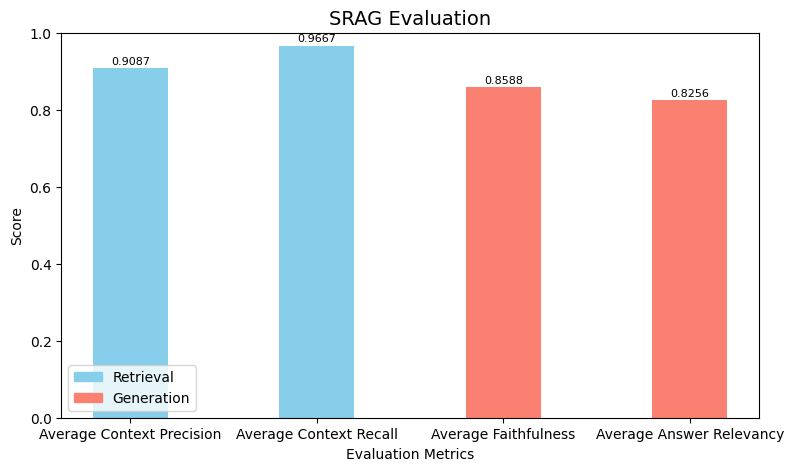

In [245]:
import matplotlib.pyplot as plt

metrics = ["Average Context Precision", "Average Context Recall", "Average Faithfulness", "Average Answer Relevancy"]
# values = [0.8761, 0.8941, 0.9186, 0.8731]
values = [0.9087, 0.9667, 0.8588, 0.8256]

plt.figure(figsize=(9, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'skyblue', 'salmon', 'salmon'], width=0.4)

plt.ylabel("Score")
plt.xlabel("Evaluation Metrics")
plt.title("SRAG Evaluation", fontsize=14)
plt.ylim(0, 1)

plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color='skyblue', label="Retrieval"),
    plt.Rectangle((0, 0), 1, 1, color='salmon', label="Generation")
], loc="lower left")

for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=8)

plt.show()